In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
ppd = pd.read_csv("/Users/ashtynhaynes/Desktop/Stat426Python/BARproject/finaldata126.csv")

In [8]:
#ppd = ppd.drop("created_utc", axis = 1)
#ppd = ppd.drop("d_", axis = 1)

In [9]:
ppd[ppd.url == "https://www.reddit.com/r/Postpartum_Depression/comments/mhn7cm/ppd_or_ppa/"]

,author,selftext,subreddit,title,url,created,date,hash
146,tidderthrow69,We had our little one a month ago . Initial co...,Postpartum_Depression,PPD or PPA,https://www.reddit.com/r/Postpartum_Depression...,1.617275e+09,2021-04-01 04:05:44,NaN
1320,tidderthrow69,We had our little one a month ago . Initial co...,Postpartum_Depression,PPD or PPA,https://www.reddit.com/r/Postpartum_Depression...,1.617275e+09,2021-04-01 04:05:44,1.509884e+19
2778,tidderthrow69,We had our little one a month ago . Initial co...,Postpartum_Depression,PPD or PPA,https://www.reddit.com/r/Postpartum_Depression...,NaN,2021-04-01 04:05:44,NaN


In [10]:
data = ppd

In [11]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [12]:
data
#data = data.drop_duplicates()


,author,selftext,subreddit,title,url,created,date,hash
1252,Justasmoltowngurl,After a traumatic delivery I knew something wa...,Postpartum_Depression,Giving hope with my story,https://www.reddit.com/r/Postpartum_Depression...,1.619835e+09,2021-04-30 19:01:43,5.817813e+18
1253,pocahontas_331,"Hi everyone, my name is Jess and I love in Ark...",Postpartum_Depression,Looking to treat my ppd through telegraphy,https://www.reddit.com/r/Postpartum_Depression...,1.619806e+09,2021-04-30 11:04:57,7.758526e+18
1254,IntelligentChard1873,I am 22 years old and a mother three young boy...,Postpartum_Depression,I am struggling,https://www.reddit.com/r/Postpartum_Depression...,1.619774e+09,2021-04-30 02:06:01,1.327200e+19
1255,Purple-Associate5695,I’m a 30yo female. I’ve had weakness and fatig...,Postpartum_Depression,Fatigue?,https://www.reddit.com/r/Postpartum_Depression...,1.619734e+09,2021-04-29 15:07:41,8.985776e+16
1256,Miserable_Bug_16,"Ok, there, I said it. I hate my mother-in-law....",Postpartum_Depression,I hate my mother-in-law,https://www.reddit.com/r/Postpartum_Depression...,1.619725e+09,2021-04-29 12:42:46,3.305805e+17
...,...,...,...,...,...,...,...,...
2416,teresaistired,Just a stupid question related to this sub.\n\...,Postpartum_Depression,Do I really belong here?,https://www.reddit.com/r/Postpartum_Depression...,1.622182e+09,2021-05-27 23:03:43,1.408077e+19
2417,SomethingLikeThat74,I hadn’t noticed that I had triggers until rec...,Postpartum_Depression,What are your triggers for PPD?,https://www.reddit.com/r/Postpartum_Depression...,1.622158e+09,2021-05-27 16:27:17,1.028625e+19
2418,soft_warm_purry,With my PPD I get triggered easily by whining ...,Postpartum_Depression,Ear plugs helping immensely with triggers,https://www.reddit.com/r/Postpartum_Depression...,1.622137e+09,2021-05-27 10:30:24,8.501163e+18
2419,wizard_mundungus,I’m a mom of two boys 5 and 3 years old. I hav...,Postpartum_Depression,Feels like it’s never going to get better,https://www.reddit.com/r/Postpartum_Depression...,1.622280e+09,2021-05-29 02:21:01,9.977671e+18


In [13]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('index')
#ps = nltk.PorterStemmer()

#data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
#data.columns = ['label', 'body_text']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:

#import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
 
# single word lemmatization examples
#list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling',
#         'driving', 'died', 'tried', 'feet']
#for words in list1:
#    print(words + " ---> " + wnl.lemmatize(words))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#import nltk

In [16]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['selftext'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(1045, 8605)
['', '0', '000', '0000', '01', '03', '0730', '1', '10', '100', '1000', '100lbs', '100making', '100mg', '100pm', '101', '1010', '1011', '1012', '1012pm', '1020', '104', '105', '10hrs', '10ish', '10lb', '10lbs', '10mg', '10mins', '10mth', '10pm', '10pm4am', '10th', '10times', '10x', '11', '111130am', '1130', '1130am', '1130pm12am', '115', '11mo', '11pm', '12', '120', '120lb', '121215pm', '125mg', '12m', '12th', '12w', '13', '130', '13lbs', '13m', '13month', '13wks', '14', '1400', '1416', '14m', '15', '1520', '15m', '15mins', '15monthold', '15x', '16', '16days', '16f', '17', '1722', '17th', '18', '180', '18009444773', '1821', '1839', '18ish', '18mo', '19', '1961', '199', '19th', '1am', '1f', '1hp', '1pm', '1pm1am', '1st', '1yo', '1½', '2', '20', '200', '2000', '200s', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2020i', '2021', '208lbs', '20lbs', '20mg', '21', '2121', '2130', '21f', '22', '220pm', '22f', '22hrs', '23', '230', '2300', '23f', '23rd',

In [18]:
words = count_vect.get_feature_names()

In [19]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df


,,0,000,0000,01,03,0730,1,10,100,...,zap,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#write data to csv
import csv
X_counts_df.to_csv('data.csv')

In [22]:
#X_counts_df[X_counts_df.author == https://www.reddit.com/r/Postpartum_Depression/comments/mhn7cm/ppd_or_ppa/]

In [23]:
sums = X_counts_df.sum(axis = 0, skipna = True)
summed = pd.DataFrame(sums).reset_index()
summed.columns = ['word', 'count']
summed['count'] = pd.to_numeric(summed['count'])

summed.sort_values(['count'],ascending=False, inplace=True)


summed[200:220]

summed.loc[summed['word'] == 'hate']

# words to use: ugly, fat, worthless, shame, unhealty, skinny, body, 
# mirror, cheat, sexy, silly, big, scar, stretch, chubby, healthy

,word,count
3608,hate,239


In [24]:
summed.loc[summed['word'] == 'baby']

,word,count
882,baby,1349


In [25]:
sumnew = summed.loc[summed['count'] >= 100]
#newwords = sumnew['word']
sumnew['word']

3013       feel
4514       like
882        baby
3935         im
3363        get
         ...   
3069       fine
2542        due
5147       next
1892    couldnt
781       asked
Name: word, Length: 226, dtype: object

In [26]:
summed

,word,count
3013,feel,1858
4514,like,1586
882,baby,1349
3935,im,1205
3363,get,1174
...,...,...
3933,illogical,1
3931,illegible,1
3922,ignorance,1
3921,ifyou,1


In [27]:
#data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data['selftext'])
#print(X_counts_sample.shape)
#print(count_vect_sample.get_feature_names())

In [28]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,,0,000,0000,01,03,0730,1,10,100,...,zap,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#get rid of duplicates
#add another month


In [31]:
# Combine words counts with post details
data = data.reset_index()
X_counts_df = X_counts_df.reset_index()
result = pd.concat([data, X_counts_df], axis=1, join='inner')
#result

In [32]:
#If the post mentions fat, ugly, or body + hate, then the post is marked as person w/ body image issues. 
result['body_image'] = np.where((result['fat'] >=1) | (result['ugly'] >=1) |
                                ((result['hate'] >=1) & (result['body'] >=1)) |
                                (result['worthless'] >=1) | (result['skinny'] >=1) |
                                (result['chubby'] >=1) | (result['mirror'] >=1) |
                                (result['cheat'] >=1) | (result['eat'] >=1) |
                                (result['scar'] >=1) |
                                (result['shame'] >=1) | 
                                (result['clothes'] >=1) | 
                                (result['fit'] >=1), "yes", 'no')


In [33]:
result['body_image'].value_counts()
#result

no     868
yes    177
Name: body_image, dtype: int64

In [34]:
data["author"].value_counts()


[deleted]            21
Miserable_Bug_16     17
Cmomma2020            9
0yuria0               9
notsotoothless        7
                     ..
Amerella              1
Aggravating_Light     1
MissMeganOhara11      1
meganohara22          1
Holly426              1
Name: author, Length: 800, dtype: int64

In [35]:
#clean_result

In [36]:
import csv
result.to_csv('data.csv')

In [114]:
clean_result = result.drop(["index","subreddit","title","url","created","date","hash", "skinny", "fat", "ugly", "hate", "worthless","chubby", "cheat", "scar", "shame", "clothes", "fit", "body", "mirror", "eat", "index"], axis = 1)

In [115]:
X_counts_df = X_counts_df.drop(["index", "skinny", "fat", "ugly", "hate", "worthless","chubby", "cheat", "scar", "shame", "clothes", "fit", "body", "mirror", "eat", "index"], axis = 1)
#clean_result['body_image']
#X_counts_df['fat']
#X_counts_df

KeyError: "['index' 'skinny' 'fat' 'ugly' 'hate' 'worthless' 'chubby' 'cheat' 'scar'\n 'shame' 'clothes' 'fit' 'body' 'mirror' 'eat' 'index'] not found in axis"

In [173]:
#split data in to x and y
y = (clean_result['body_image'] == 'yes').astype(int)
#text2 = X_counts_df.drop('body_image', axis=1)
text = X_counts_df.values.astype('U')

In [174]:
import random
random.seed(342)
#make train and test
X_train, X_test, y_train, y_test = train_test_split(text,y, random_state=713, test_size=.2)

## Modeling

In [118]:
# naive bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_hat = nb.predict(X_test)
y_hat[0:3]
y_prob = nb.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
# macro average of precision
np.round((.88+.98)/2,2)
# weighted average of precision
np.round(((.88*224)+(.98*1448))/1672,2)
nb_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresh = roc_curve(y_test, y_prob)
# predict class values
nb_precision, nb_recall, _ = precision_recall_curve(y_test, y_prob)

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.84      0.96      0.90       168
           1       0.65      0.27      0.38        41

    accuracy                           0.83       209
   macro avg       0.75      0.62      0.64       209
weighted avg       0.81      0.83      0.80       209



/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


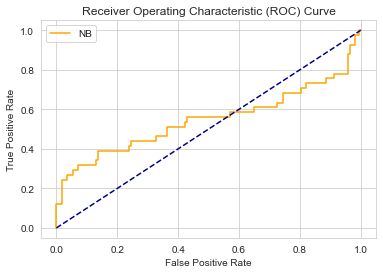

In [119]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [120]:
nb_auc

0.5458768873403019

In [121]:
#logistic regression
lr = LogisticRegression(solver='liblinear', C=1)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
y_hat[0:3]
y_prob = lr.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
lr_auc = roc_auc_score(y_test, y_prob)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, y_prob)
# predict class values
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob)
lr_f1, lr_auc = f1_score(y_test, y_hat), auc(lr_recall, lr_precision)

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.85      0.95      0.89       168
           1       0.57      0.29      0.39        41

    accuracy                           0.82       209
   macro avg       0.71      0.62      0.64       209
weighted avg       0.79      0.82      0.79       209



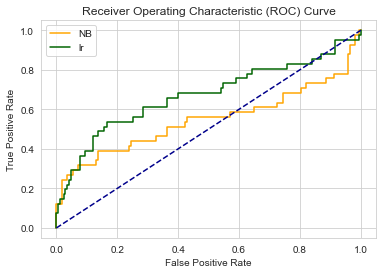

In [122]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [123]:
#decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat[0:3]
y_prob = clf.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
clf_auc = roc_auc_score(y_test, y_prob)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, y_prob)
# predict class values
clf_precision, clf_recall, _ = precision_recall_curve(y_test, y_prob)


              precision    recall  f1-score   support

           0       0.83      0.92      0.88       168
           1       0.43      0.24      0.31        41

    accuracy                           0.79       209
   macro avg       0.63      0.58      0.59       209
weighted avg       0.76      0.79      0.77       209



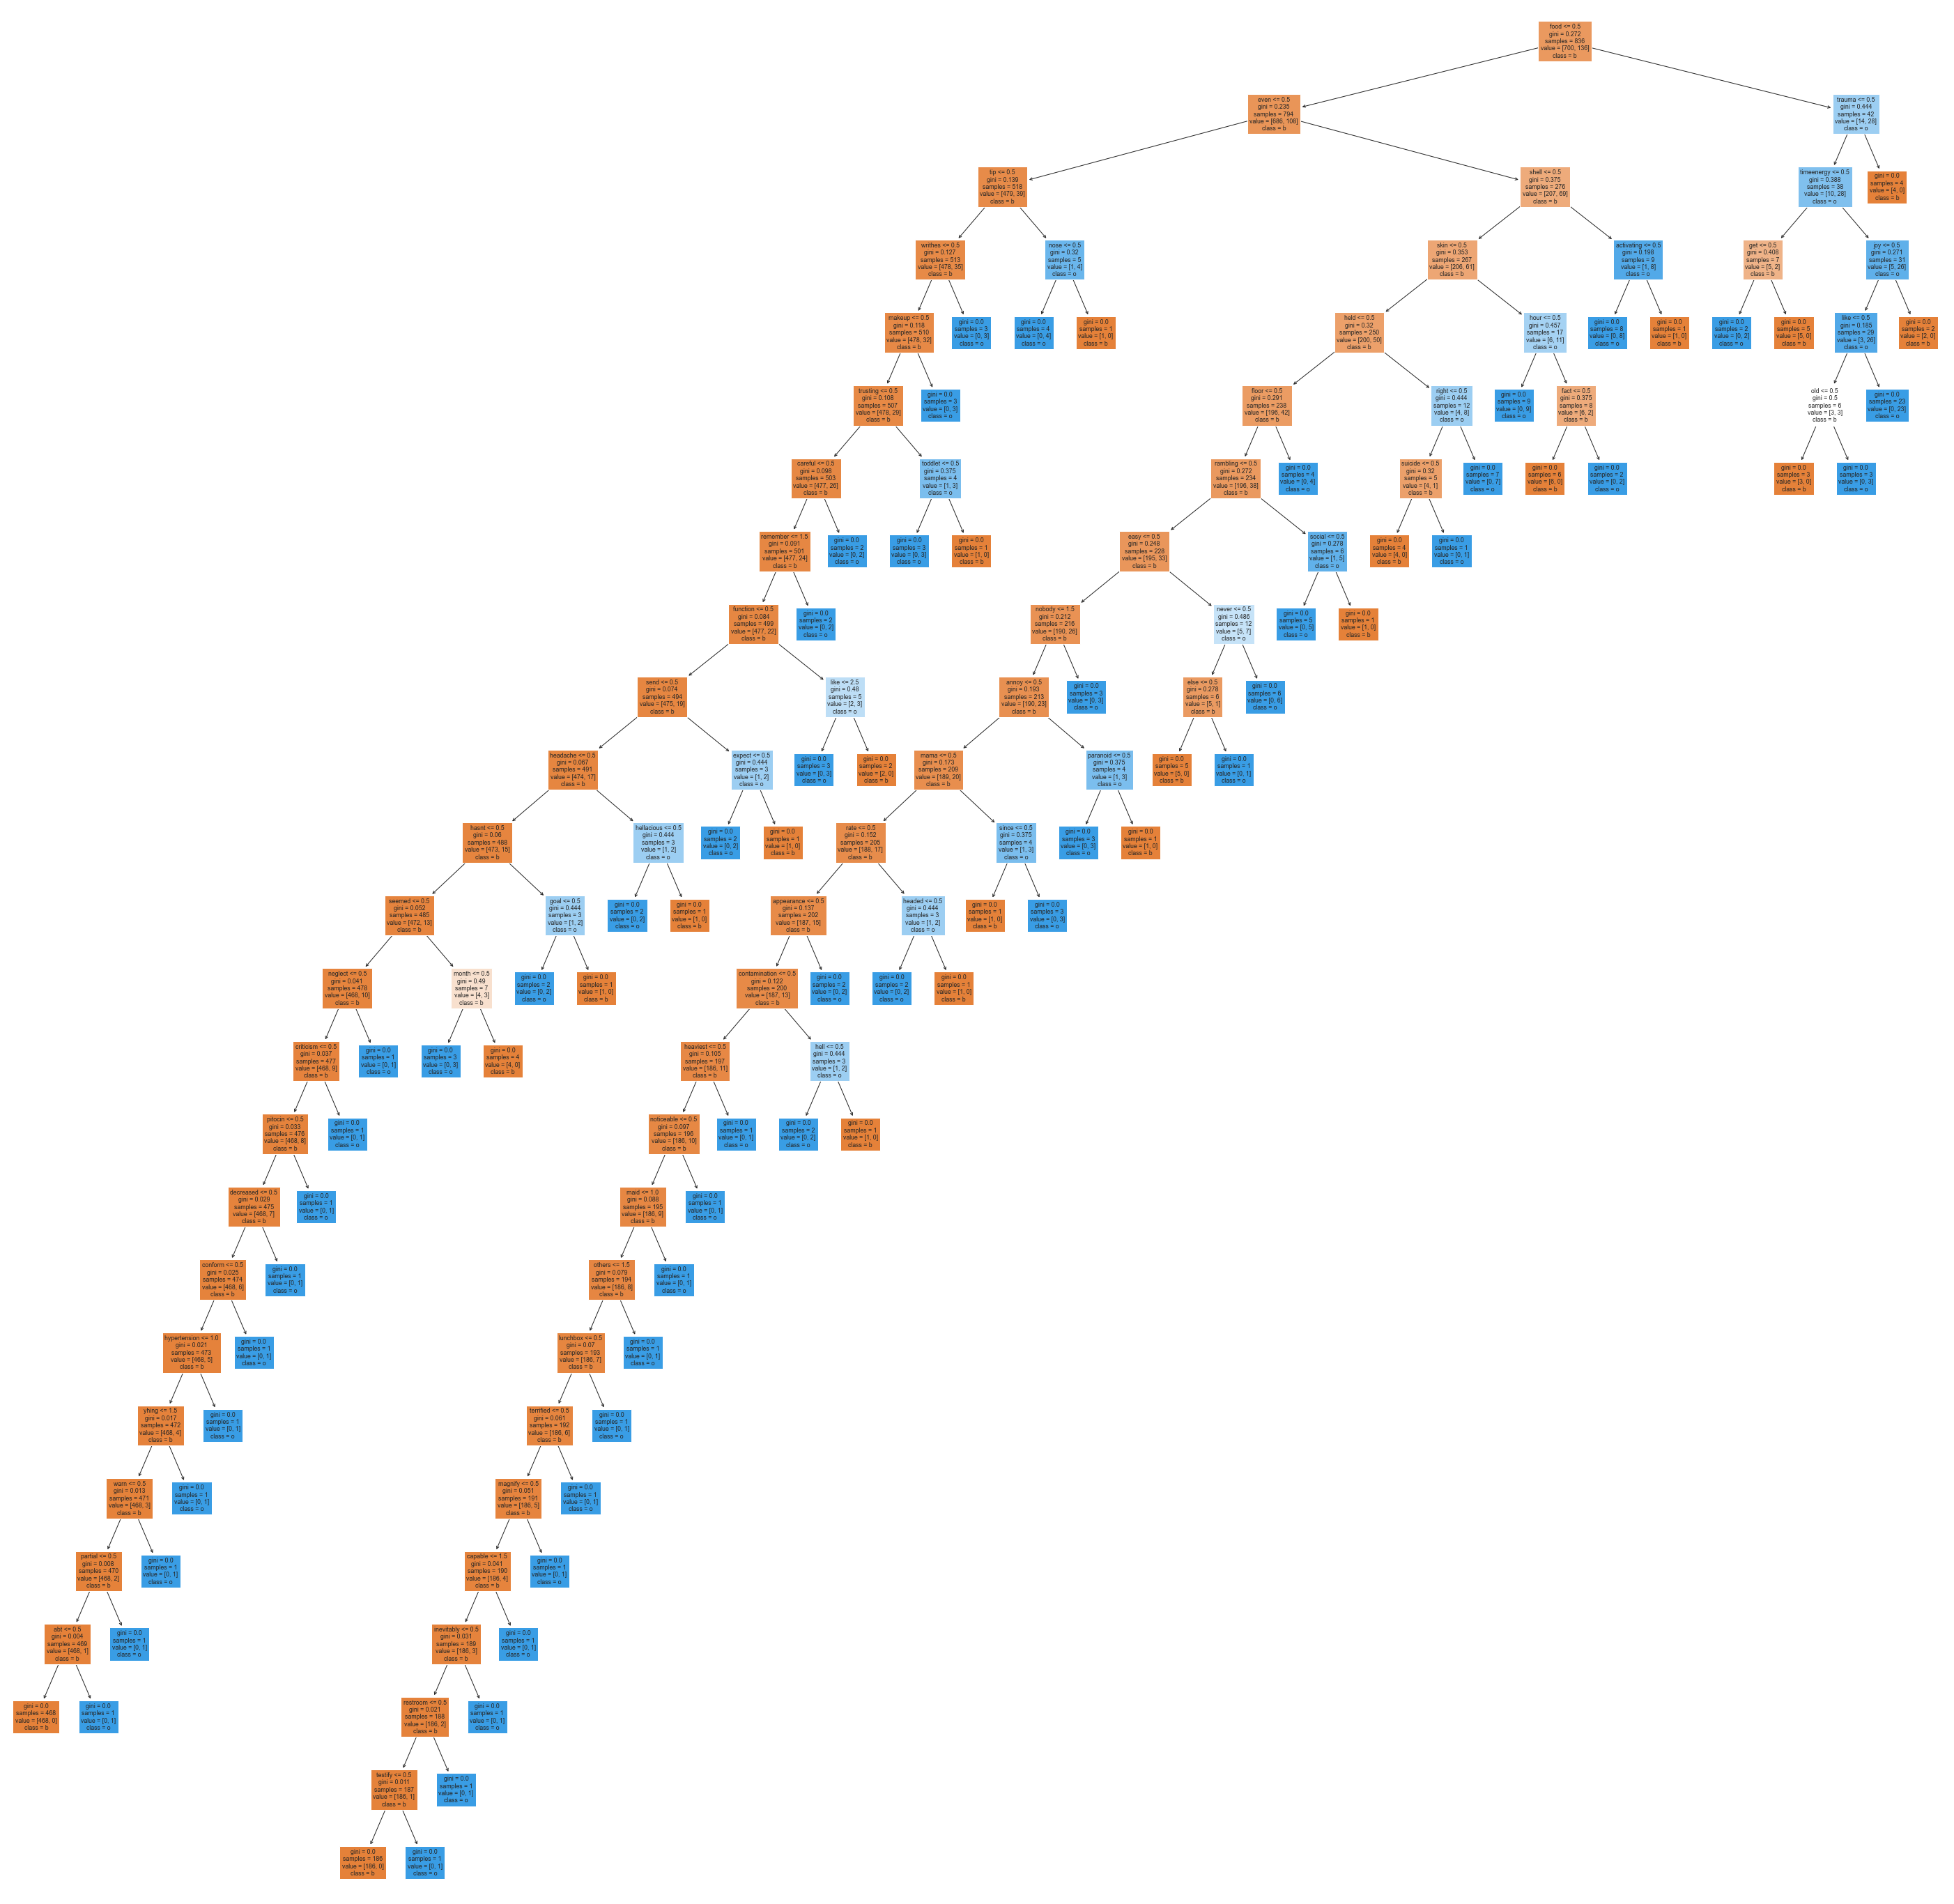

In [124]:

fig = plt.figure(figsize=(50,50))
_= tree.plot_tree(clf,
                 feature_names=clean_result.columns,
                 class_names="body_image",
                 filled=True)

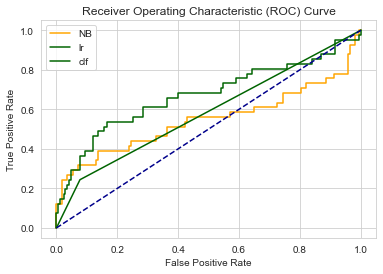

In [125]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='darkgreen',label='clf')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [175]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool)
#y_hat = rf.predict(X_test)
#y_hat[0:3]
#y_prob = rf.predict_proba(X_test)[:,1] 
#y_prob
y_prob = (rf.predict_proba(X_test)[:,1] >= 0.1).astype(bool)

#prob_preds = rf.predict_proba(X)
#threshold = 0.11 # define threshold here
#preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]

confusion_matrix(y_test, y_prob)
metrics.accuracy_score(y_test, y_prob)
metrics.precision_score(y_test, y_prob)
metrics.recall_score(y_test, y_prob)
print(metrics.classification_report(y_test, y_prob))
rf_auc = roc_auc_score(y_test, y_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_prob)
# predict class values
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       168
           1       0.35      0.85      0.49        41

    accuracy                           0.66       209
   macro avg       0.65      0.73      0.62       209
weighted avg       0.83      0.66      0.69       209



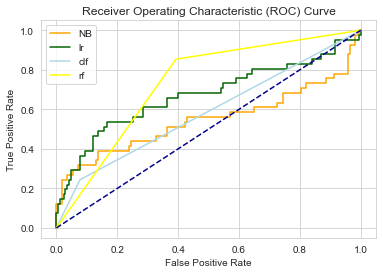

In [176]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='lightblue',label='clf')
plt.plot(fpr_rf, tpr_rf, color='yellow',label='rf')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [164]:
# gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_hat = gb.predict(X_test)
y_hat[0:3]
y_prob = gb.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
gb_auc = roc_auc_score(y_test, y_prob)
fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_prob)
# predict class values
gb_precision, gb_recall, _ = precision_recall_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       168
           1       0.62      0.20      0.30        41

    accuracy                           0.82       209
   macro avg       0.72      0.58      0.60       209
weighted avg       0.79      0.82      0.78       209



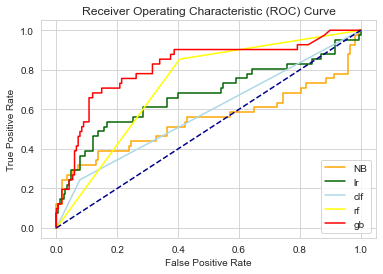

In [165]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='lightblue',label='clf')
plt.plot(fpr_rf, tpr_rf, color='yellow',label='rf')
plt.plot(fpr_gb, tpr_gb, color='red',label='gb')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [177]:
#auc
print(nb_auc)
print(rf_auc)
print(clf_auc)
print(gb_auc)
print(lr_auc)

0.5458768873403019
0.7304006968641115
0.583260743321719
0.8155487804878048
0.4455323728812945


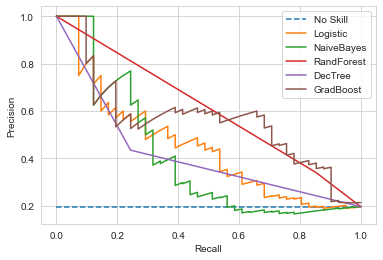

In [169]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, label='Logistic')
plt.plot(nb_recall, nb_precision, label='NaiveBayes')
plt.plot(rf_recall, rf_precision,  label='RandForest')
plt.plot(clf_recall, clf_precision,  label='DecTree')
plt.plot(gb_recall, gb_precision,  label='GradBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [170]:
# try different threshold with random forest
# how to find imporatn features from model we choose

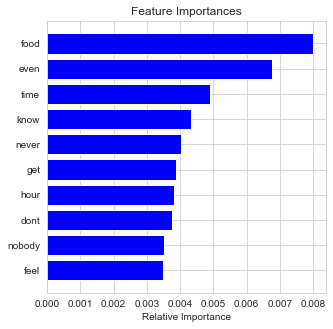

In [178]:
# plot Random Forest important features
features = X_counts_df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

# how many 
num_features = 10 

plt.figure(figsize=(5,5))
plt.title('Feature Importances')

# top 10 important features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

array([4295, 5183, 5182, 5180, 5179, 5178, 5177, 5174, 5173, 5171, 5170,
       5185, 5169, 5166, 5165, 5163, 5162, 5159, 5158, 5156])